# importing modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# creating dataset

In [2]:
def generate_dataset(range_start, range_end, sample_size=1000, noise_std=10.0):
    noise = np.random.normal(0, noise_std, size=sample_size) # for a more realistic dataset we add some noise
    X = np.random.uniform(range_start, range_end, size=sample_size)
    y = y = (0.2 * X**6 
         - 0.5 * X**5 
         + 2 * X**4 
         - 5 * X**3 
         + 3 * X**2 
         - 10 * X 
         + 5 
         + noise)

    return X, y


# visualizing dataset

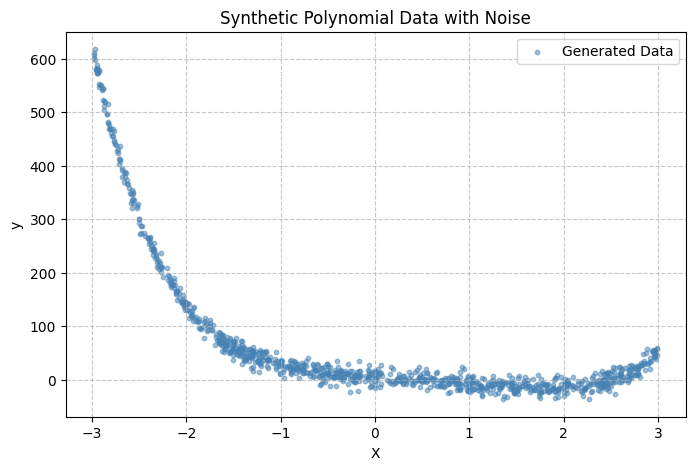

In [3]:
X, y = generate_dataset(-3, 3)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=10, alpha=0.5, color='steelblue', label='Generated Data')
plt.title('Synthetic Polynomial Data with Noise')
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# splitting the dataset
this part has three steps:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_out, y_out = generate_dataset(5,7)
_, X_out_test, _, y_out_test = train_test_split(X_out, y_out, test_size=.2, random_state=42)

# visualizing dataset

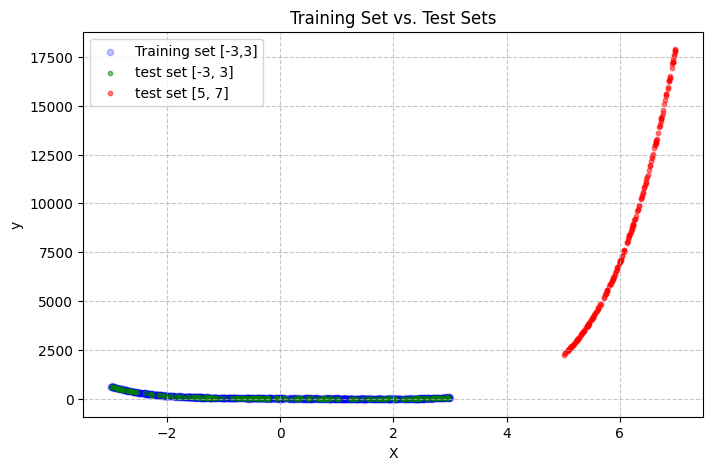

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, s=20, alpha=0.25, color='blue', label='Training set [-3,3]')
plt.scatter(X_test, y_test, s=10, alpha=0.5, color='green', label='test set [-3, 3]')
plt.scatter(X_out_test, y_out_test, s=10, alpha=0.5, color='red', label='test set [5, 7]')
plt.title('Training Set vs. Test Sets')
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# polynomial regression training

In [9]:
def train_models(x, y, degree):
    
    lr = LinearRegression()
    feature = PolynomialFeatures(degree=degree)
    model = make_pipeline(feature, lr)
    model.fit(x.reshape(-1, 1), y)

    return model

In [12]:
models = {}
last_degree = 9
for d in range(2, last_degree+1):
    models[d] = train_models(X_train, y_train, d)
models

{2: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 3: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                 ('linearregression', LinearRegression())]),
 4: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                 ('linearregression', LinearRegression())]),
 5: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                 ('linearregression', LinearRegression())]),
 6: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                 ('linearregression', LinearRegression())]),
 7: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                 ('linearregression', LinearRegression())]),
 8: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                 ('linearregression', LinearRegression())]),
 9: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(d

# model evaluation

In [13]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        losses[degree] = mean_squared_error(y_test, y_pred)
    
    return losses

In [14]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test, y_test)
losses_out_of_range = evaluate_models(models, X_out_test, y_out_test)

In [16]:
print(losses_train, "\n", losses_in_range, "\n", losses_out_of_range)

{2: 2588.026168508056, 3: 883.1635937482511, 4: 134.07507404457598, 5: 106.67415930311985, 6: 99.48754741401379, 7: 99.42970480829473, 8: 99.36977166494046, 9: 99.35331963273616} 
 {2: 2825.245856409867, 3: 908.9494382721812, 4: 118.57066332510247, 5: 96.58074335984966, 6: 93.15603070944981, 7: 92.98624273652487, 8: 92.94714938992072, 9: 92.78790789624335} 
 {2: 77722108.56945471, 3: 116141389.25191456, 4: 29221421.778678168, 5: 90732243.0499512, 6: 1092317.4481817689, 7: 4738255.702673484, 8: 255082838.5013458, 9: 2179794997.7545815}


# Analyzing Model Scores

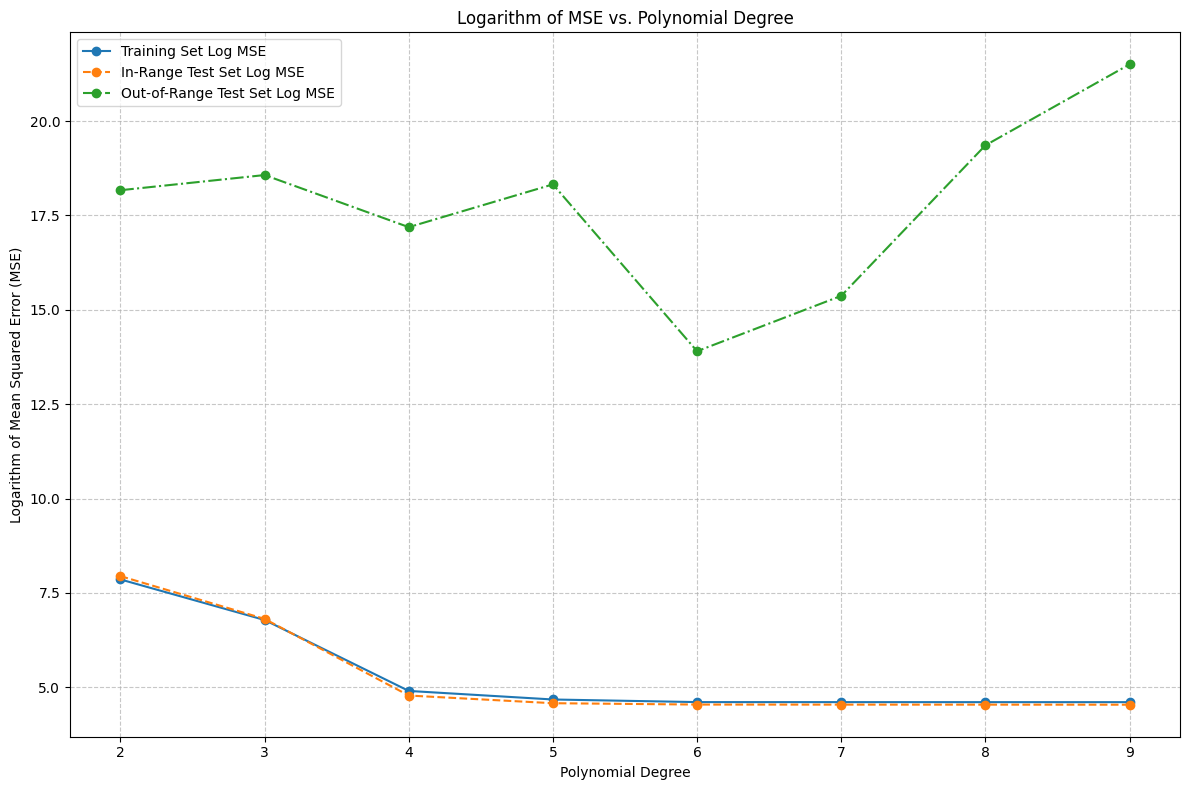

In [18]:
log_losses_train = np.log1p(list(losses_train.values()))
log_losses_in_range = np.log1p(list(losses_in_range.values()))
log_losses_out_of_range = np.log1p(list(losses_out_of_range.values()))

degrees = range(2, last_degree+1)
plt.figure(figsize=(12, 8))
plt.plot(degrees, list(log_losses_train), marker='o', linestyle='-', label='Training Set Log MSE')
plt.plot(degrees, list(log_losses_in_range), marker='o', linestyle='--', label='In-Range Test Set Log MSE')
plt.plot(degrees, list(log_losses_out_of_range), marker='o', linestyle='-.', label='Out-of-Range Test Set Log MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(degrees)
plt.tight_layout()
plt.show()

In [19]:
print(f"{'Degree':<10}{'Train MSE':<20}{'In-Range Test MSE':<20}{'Out-of-Range Test MSE':<20}")
for i in range(last_degree - 1):
    print(f"{i + 2:<10}{log_losses_train[i]:<20.2f}{log_losses_in_range[i]:<20.2f}{log_losses_out_of_range[i]:<20.2f}")

Degree    Train MSE           In-Range Test MSE   Out-of-Range Test MSE
2         7.86                7.95                18.17               
3         6.78                6.81                18.57               
4         4.91                4.78                17.19               
5         4.68                4.58                18.32               
6         4.61                4.54                13.90               
7         4.61                4.54                15.37               
8         4.61                4.54                19.36               
9         4.61                4.54                21.50               


# Working with a real dataset

In [ ]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [26]:
df[df['smoker'] == 'yes'].value_counts()

age  sex     bmi     children  smoker  region     charges    
18   female  21.660  0         yes     northeast  14283.45940    1
45   male    30.360  0         yes     southeast  62592.87309    1
46   male    42.350  3         yes     southeast  46151.12450    1
             30.495  3         yes     northwest  40720.55105    1
     female  35.530  0         yes     northeast  42111.66470    1
                                                                ..
31   male    29.810  0         yes     southeast  19350.36890    1
             34.390  3         yes     northwest  38746.35510    1
             36.300  2         yes     southwest  38711.00000    1
32   female  17.765  2         yes     northwest  32734.18630    1
64   male    36.960  2         yes     southeast  49577.66240    1
Name: count, Length: 274, dtype: int64

# Preprocessing

In [ ]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [31]:
df['sex'] = df['sex'].astype(bool)
df['smoker'] = df['smoker'].astype(bool)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
1,18,True,33.770,1,False,southeast,1725.55230
2,28,True,33.000,3,False,southeast,4449.46200
3,33,True,22.705,0,False,northwest,21984.47061
4,32,True,28.880,0,False,northwest,3866.85520


In [32]:
region = pd.get_dummies(df['region'])
region

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [33]:
df = pd.concat([df, region], axis = 1)
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,False,27.900,0,True,southwest,16884.92400,False,False,False,True
1,18,True,33.770,1,False,southeast,1725.55230,False,False,True,False
2,28,True,33.000,3,False,southeast,4449.46200,False,False,True,False
3,33,True,22.705,0,False,northwest,21984.47061,False,True,False,False
4,32,True,28.880,0,False,northwest,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,northwest,10600.54830,False,True,False,False
1334,18,False,31.920,0,False,northeast,2205.98080,True,False,False,False
1335,18,False,36.850,0,False,southeast,1629.83350,False,False,True,False
1336,21,False,25.800,0,False,southwest,2007.94500,False,False,False,True


In [34]:
df.drop('region', axis = 1, inplace = True)

In [35]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,False,27.900,0,True,16884.92400,False,False,False,True
1,18,True,33.770,1,False,1725.55230,False,False,True,False
2,28,True,33.000,3,False,4449.46200,False,False,True,False
3,33,True,22.705,0,False,21984.47061,False,True,False,False
4,32,True,28.880,0,False,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,10600.54830,False,True,False,False
1334,18,False,31.920,0,False,2205.98080,True,False,False,False
1335,18,False,36.850,0,False,1629.83350,False,False,True,False
1336,21,False,25.800,0,False,2007.94500,False,False,False,True


In [36]:
df.fillna(df.mean(), inplace=True)

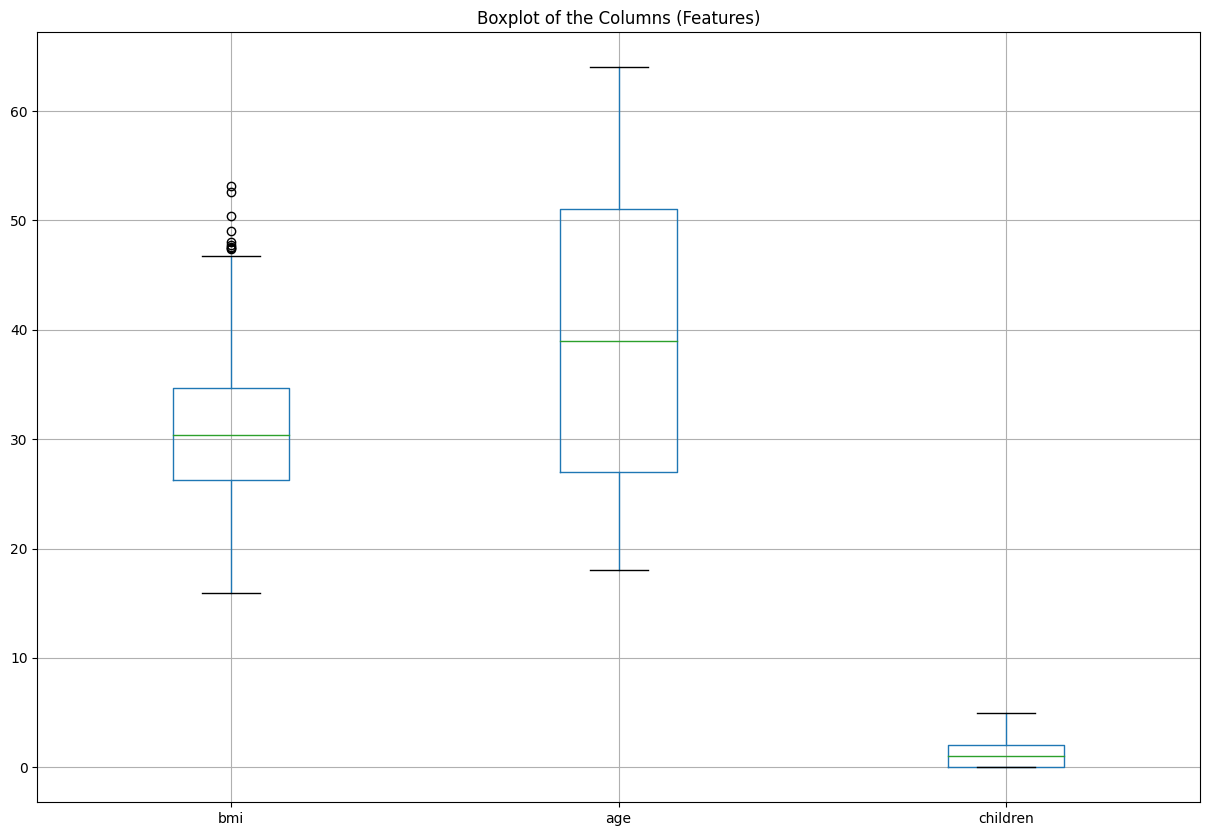

Total of 9 outliers detected. Data has been scaled.
[[-0.45332    -1.43876426 -0.90861367]
 [ 0.5096211  -1.50996545 -0.07876719]
 [ 0.38330685 -0.79795355  1.58092576]
 [-1.30553108 -0.4419476  -0.90861367]
 [-0.29255641 -0.51314879 -0.90861367]]


In [38]:
# Outlier detection

plt.figure(figsize=(15, 10))
plt.title("Boxplot of the Columns (Features)")

X = df[['bmi', 'age', 'children']]

X.boxplot()

plt.show()


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()


if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Total of {outliers} outliers detected. Data has been scaled.")
    print(X_scaled[:5])
else:
    print("No outliers detected.")